In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
df = pd.read_csv('car_prices.csv')


In [2]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


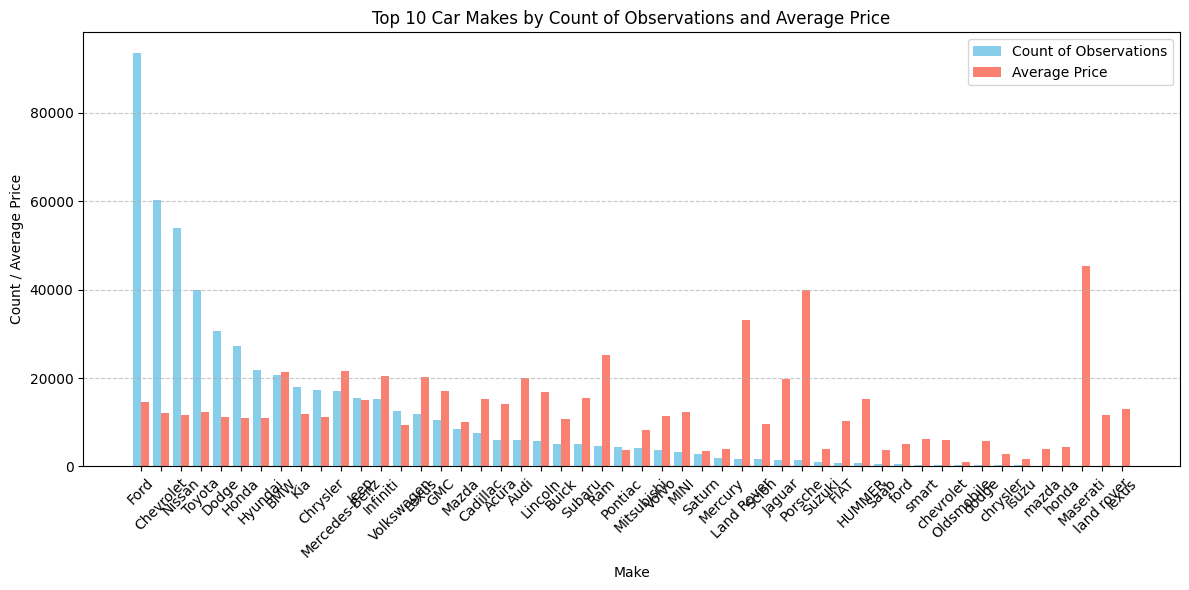

In [3]:
make_stats = df.groupby('make').agg({'sellingprice': ['count', 'mean']})
make_stats.columns = make_stats.columns.droplevel(0)

top_10_makes = make_stats['count'].nlargest(50)
top_10_avg_prices = make_stats.loc[top_10_makes.index]['mean']




plt.figure(figsize=(12, 6))

# Defining bar width
bar_width = 0.4

# Plotting the count of observations
plt.bar(np.arange(len(top_10_makes)), top_10_makes, width=bar_width, color='skyblue', label='Count of Observations')

# Plotting the average price for each make as a different color bar
plt.bar(np.arange(len(top_10_avg_prices)) + bar_width, top_10_avg_prices, width=bar_width, color='salmon', label='Average Price')

plt.title('Top 10 Car Makes by Count of Observations and Average Price')
plt.xlabel('Make')
plt.ylabel('Count / Average Price')
plt.xticks(np.arange(len(top_10_makes)) + bar_width / 2, top_10_makes.index, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Were going to reduce our dataset by taking only observations belonging to the top 50 car dealers. The boost in accuracy we will receive by focusing on 50 brands will benefit us more than reducing the dataset will hurt us.

In [4]:

top_50_dealers = df['make'].value_counts().nlargest(50).index

df = df[df['make'].isin(top_50_dealers)]


df.drop(columns = {'seller', 'vin', 'trim','model', 'body', 'interior'}, inplace= True)
df.head()

,year,make,transmission,state,condition,odometer,color,mmr,sellingprice,saledate
0,2015,Kia,automatic,ca,5.0,16639.0,white,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,automatic,ca,5.0,9393.0,white,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,automatic,ca,45.0,1331.0,gray,31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,automatic,ca,41.0,14282.0,white,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,automatic,ca,43.0,2641.0,gray,66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


There is some good data in the saledate column, So were going to break it into 3 columns. SaleYear, SaleMonth, and SaleWeekday to hopefully create some valuable variables

In [5]:


# Extract SaleWeekday (first 3 characters)
df['saleWeekday'] = df['saledate'].str[:3]

# Extract SaleMonth (next 3 characters)
df['saleMonth'] = df['saledate'].str[4:7]

# Extract SaleYear (last 4 characters of the string)
df['saleYear'] = df['saledate'].str[11:15]


df.drop(columns = {'saledate'}, inplace = True)
df.rename(columns = {'year': 'modelYear'}, inplace = True)

df.head()



,modelYear,make,transmission,state,condition,odometer,color,mmr,sellingprice,saleWeekday,saleMonth,saleYear
0,2015,Kia,automatic,ca,5.0,16639.0,white,20500.0,21500.0,Tue,Dec,2014
1,2015,Kia,automatic,ca,5.0,9393.0,white,20800.0,21500.0,Tue,Dec,2014
2,2014,BMW,automatic,ca,45.0,1331.0,gray,31900.0,30000.0,Thu,Jan,2015
3,2015,Volvo,automatic,ca,41.0,14282.0,white,27500.0,27750.0,Thu,Jan,2015
4,2014,BMW,automatic,ca,43.0,2641.0,gray,66000.0,67000.0,Thu,Dec,2014


Let's check out the spread for car condition

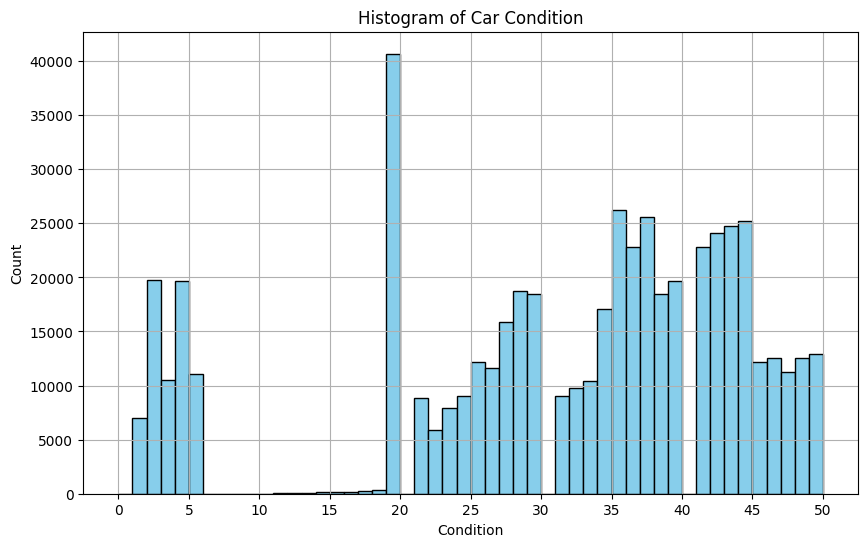

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(df['condition'], bins=range(0, 51, 1), color='skyblue', edgecolor='black')
plt.xticks(range(0, 51, 5))  # Set x-axis ticks every 5 units
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Histogram of Car Condition')
plt.grid(True)
plt.show()

Now purchases by State

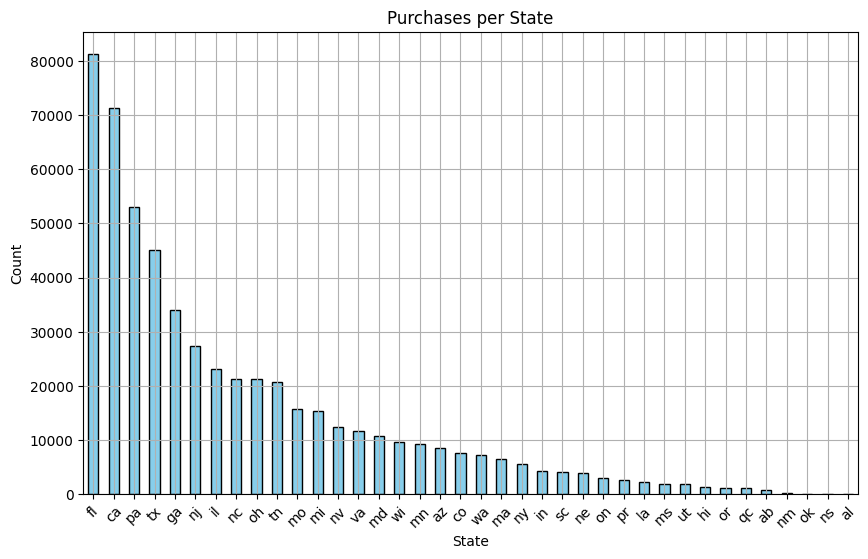

In [7]:
top_50_categories = df['state'].value_counts().nlargest(38).index
df_filtered = df[df['state'].isin(top_50_categories)]


plt.figure(figsize=(10, 6))
df_filtered['state'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Purchases per State')
plt.xticks(rotation=45)  # Rotate x-axis labels to avoid overlapping
plt.grid(True)
plt.show()

Strangely, we don't seem have to data on every state, we can still make do 


Now were going to do some variable engineering

In [8]:
result = df.groupby(['make','modelYear']).agg(
    avg_sellingprice=('sellingprice', 'mean'),
    avg_mmr=('mmr', 'mean'),
    avg_condition=('condition', 'mean'),
    avg_odometer=('odometer', 'mean')
).reset_index()

result.head()

,make,modelYear,avg_sellingprice,avg_mmr,avg_condition,avg_odometer
0,Acura,1993,383.333333,308.333333,1.000000,260645.000000
1,Acura,1994,705.000000,755.000000,1.888889,191517.200000
2,Acura,1995,490.625000,778.125000,1.625000,189862.500000
3,Acura,1996,815.384615,825.000000,1.833333,191854.923077
4,Acura,1997,939.843750,883.593750,13.483871,200199.500000


In [9]:
merged_df = pd.merge(df, result, on=['make','modelYear'], how='left')
merged_df['odometerDiff'] = merged_df['odometer'] - merged_df['avg_odometer']
merged_df['conditionDiff'] = merged_df['condition'] - merged_df['avg_condition']
merged_df['mmrDiff'] = merged_df['mmr'] - merged_df['avg_mmr']

In [10]:
merged_df.color.unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', nan, 'orange', 'off-white', 'turquoise', 'pink',
       'lime', '4802', '9410', '1167', '2172', '14872', '12655', '15719',
       '6388', '16633', '11034', '2711', '6864', '339', '18384', '9887',
       '9837', '20379', '20627', '721', '6158', '2817', '5705', '18561',
       '2846', '9562', '5001'], dtype=object)

In [11]:
#Now were going to refine the color variable which may help with modeling

#Theres probably a better way to do this, but for many observations the color is just numbers
#these were the only colors I could see from viewing the dataset
colors = ['red', 'blue', 'green', 'yellow', 'beige', 'off-white', 'silver', 'brown', 'black', 'white','gray', 'cyan', 'silver', 'maroon', 'navy', 'olive', 'teal', 'lavender', 'peach', 'turquoise', 'orange', 'burgundy', 'gold', 'charcoal', 'lime', 'pink', 'purple']


merged_df = merged_df[merged_df['color'].astype(str).isin(colors)]


merged_df.color.unique()


array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

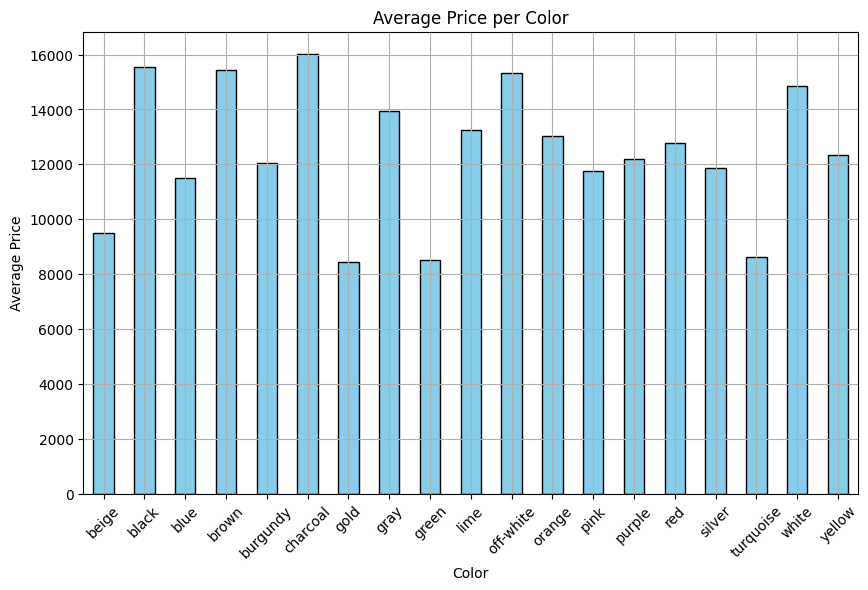

In [12]:
plt.figure(figsize=(10, 6))
merged_df.groupby('color')['sellingprice'].mean().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Color')
plt.ylabel('Average Price')
plt.title('Average Price per Color')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()

In [13]:
merged_df.dropna(inplace=True)

In [14]:
#Converting date variables to numeric for modeling
weekday_map = {
    'Mon': 1,
    'Tue': 2,
    'Wed': 3,
    'Thu': 4,
    'Fri': 5,
    'Sat': 6,
    'Sun': 7
}

# Convert weekday strings to numeric values using the map function
merged_df['weekDay'] = merged_df['saleWeekday'].map(weekday_map)



month_map = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

transmission_map = {
    'automatic': 1,
    'manual': 0
}

# Map transmission values to numeric values using the map function
merged_df['transmission'] = merged_df['transmission'].map(transmission_map)




# Convert month strings to numeric values using the map function
merged_df['month'] = merged_df['saleMonth'].map(month_map)


merged_df['Age'] = merged_df['saleYear'].astype(int) - merged_df['modelYear'].astype(int)


merged_df.drop(columns = {'saleWeekday', 'saleMonth', 'saleYear'}, inplace = True)

In [15]:
merged_df = merged_df[merged_df['Age'] >= 0]

In [16]:
merged_df

,modelYear,make,transmission,state,condition,odometer,color,mmr,sellingprice,avg_sellingprice,avg_mmr,avg_condition,avg_odometer,odometerDiff,conditionDiff,mmrDiff,weekDay,month,Age
2,2014,BMW,1,ca,45.0,1331.0,gray,31900.0,30000.0,43044.698703,42956.574292,38.369514,9608.114976,-8277.114976,6.630486,-11056.574292,4,1,1
3,2015,Volvo,1,ca,41.0,14282.0,white,27500.0,27750.0,26107.682620,26178.337531,40.909320,14238.677582,43.322418,0.090680,1321.662469,4,1,0
4,2014,BMW,1,ca,43.0,2641.0,gray,66000.0,67000.0,43044.698703,42956.574292,38.369514,9608.114976,-6967.114976,4.630486,23043.425708,4,12,0
6,2014,BMW,1,ca,34.0,14943.0,black,69000.0,65000.0,43044.698703,42956.574292,38.369514,9608.114976,5334.885024,-4.369514,26043.425708,3,12,0
7,2014,Chevrolet,1,ca,2.0,28617.0,black,11900.0,9800.0,18372.808322,18635.003744,23.337457,23010.255321,5606.744679,-21.337457,-6735.003744,2,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547228,2011,BMW,1,fl,39.0,66403.0,white,20300.0,22800.0,21949.596626,22213.476348,35.988897,45033.520352,21369.479648,3.011103,-1913.476348,2,7,4
547230,2012,Ram,1,wa,5.0,54393.0,white,30200.0,30800.0,22724.018771,23041.424915,31.810717,58087.444539,-3694.444539,-26.810717,7158.575085,3,7,3
547231,2012,BMW,1,ca,48.0,50561.0,black,29800.0,34000.0,30177.933732,30424.608836,38.248848,36192.583659,14368.416341,9.751152,-624.608836,3,7,3
547232,2015,Nissan,1,ga,38.0,16658.0,white,15100.0,11100.0,16513.402889,17884.711075,28.029032,9091.231140,7566.768860,9.970968,-2784.711075,4,7,0


Lets start modeling 

In [17]:
import xgboost as xgb

from xgboost import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer, mean_squared_error # for scoring
from sklearn.model_selection import GridSearchCV, cross_val_score #cross validation
from sklearn.metrics import confusion_matrix #confusion matrix stuff
import seaborn as sns

In [18]:
X = merged_df.drop('sellingprice', axis = 1).copy()
y = merged_df['sellingprice'].copy()

X.dtypes

modelYear             int64
make                 object
transmission          int64
state                object
condition           float64
odometer            float64
color                object
mmr                 float64
avg_sellingprice    float64
avg_mmr             float64
avg_condition       float64
avg_odometer        float64
odometerDiff        float64
conditionDiff       float64
mmrDiff             float64
weekDay               int64
month                 int64
Age                   int32
dtype: object

In [19]:
#the floats are good but the object type for our categorical variables will be a problem

X =pd.get_dummies(X,columns = ['make', 'state', 'color'])

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 21, test_size =0.25)

In [20]:
X.dtypes

modelYear            int64
transmission         int64
condition          float64
odometer           float64
mmr                float64
                    ...   
color_red             bool
color_silver          bool
color_turquoise       bool
color_white           bool
color_yellow          bool
Length: 118, dtype: object

In [21]:
# X.corr()

# plt.figure(figsize=(24, 12))
# sns.heatmap(X, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# plt.title('Correlation Matrix of Features')
# plt.show()

In [22]:
# xgb_reg = xgb.XGBRegressor()

# clf = GridSearchCV(xgb_reg, {'max_depth' : [2,4,6,8,10], "n_estimators": [50, 100, 200]},verbose=1)

# clf.fit(X,y)

# print(clf.best_score_)
# print(clf.best_params_)


In [23]:
import graphviz

xgb_reg = xgb.XGBRegressor(max_depth = 6, n_estimators = 100)

xgb_reg.fit(X_train,
            y_train,
            verbose=1,
            early_stopping_rounds = 30,
            eval_metric = 'rmse',
            eval_set = [(X_test, y_test)]
            )

score = xgb_reg.score(X_train, y_train)
print('Training Data score: ' + str(score))


cv_score = cross_val_score(xgb_reg, X_train, y_train, cv= 10)
print("CV mean score: " + str(cv_score.mean()))


ypred = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, ypred)

print("MSE: " + str(mse))
print("RMSE: ", str(np.sqrt(mse)))

[0]	validation_0-rmse:6737.85907
[1]	validation_0-rmse:4883.38916
[2]	validation_0-rmse:3642.37685
[3]	validation_0-rmse:2834.57315


c:\Python\python39\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Python\python39\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:2328.05787
[5]	validation_0-rmse:2022.48801
[6]	validation_0-rmse:1849.99268
[7]	validation_0-rmse:1749.65750
[8]	validation_0-rmse:1692.66307
[9]	validation_0-rmse:1654.26616
[10]	validation_0-rmse:1633.43924
[11]	validation_0-rmse:1618.22690
[12]	validation_0-rmse:1607.19360
[13]	validation_0-rmse:1599.72228
[14]	validation_0-rmse:1598.77000
[15]	validation_0-rmse:1593.58482
[16]	validation_0-rmse:1588.64077
[17]	validation_0-rmse:1583.95002
[18]	validation_0-rmse:1579.86304
[19]	validation_0-rmse:1574.85389
[20]	validation_0-rmse:1573.98857
[21]	validation_0-rmse:1572.50565
[22]	validation_0-rmse:1569.16159
[23]	validation_0-rmse:1566.57840
[24]	validation_0-rmse:1565.09450
[25]	validation_0-rmse:1564.54395
[26]	validation_0-rmse:1560.86411
[27]	validation_0-rmse:1559.37294
[28]	validation_0-rmse:1558.60367
[29]	validation_0-rmse:1558.15911
[30]	validation_0-rmse:1554.86038
[31]	validation_0-rmse:1554.19903
[32]	validation_0-rmse:1550.28262
[33]	validation_0-rm

In [24]:
X_test['price'] = y_test
X_test['predicted_price'] = ypred

X_test['Difference'] = abs(X_test['predicted_price'] - X_test['price'])

df = X_test

df.sort_values('Difference', ascending = False)

,modelYear,transmission,condition,odometer,mmr,avg_sellingprice,avg_mmr,avg_condition,avg_odometer,odometerDiff,...,color_pink,color_purple,color_red,color_silver,color_turquoise,color_white,color_yellow,price,predicted_price,Difference
437731,2015,1,41.0,5277.0,170000.0,52187.878788,54906.818182,34.719697,8549.666667,-3272.666667,...,False,False,False,False,False,True,False,173000.0,92998.750000,80001.250000
6622,2011,1,41.0,22128.0,123000.0,24295.012240,24850.764994,33.339341,47226.321297,-25098.321297,...,False,False,False,False,False,False,False,117800.0,58704.242188,59095.757812
234916,2014,1,5.0,530.0,170000.0,43044.698703,42956.574292,38.369514,9608.114976,-9078.114976,...,False,False,False,False,False,False,False,159000.0,106968.203125,52031.796875
440935,2014,1,48.0,194.0,94000.0,66080.207921,66888.118812,37.584158,10734.396040,-10540.396040,...,False,False,False,False,False,True,False,92500.0,141308.531250,48808.531250
519238,2014,1,5.0,2119.0,145000.0,43044.698703,42956.574292,38.369514,9608.114976,-7489.114976,...,False,False,False,False,False,True,False,138500.0,93158.429688,45341.570312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217848,2012,1,36.0,33778.0,12100.0,14667.215569,14754.784661,32.915034,36185.435333,-2407.435333,...,False,False,False,True,False,False,False,12200.0,12200.040039,0.040039
387285,2012,1,29.0,35350.0,12850.0,10807.126168,10912.500000,33.374408,36029.637850,-679.637850,...,False,False,False,False,False,False,False,12200.0,12199.959961,0.040039
434420,2014,1,43.0,14091.0,12350.0,18320.098118,18649.582364,19.510083,24685.259729,-10594.259729,...,False,False,False,False,False,True,False,12700.0,12699.985352,0.014648
143656,2005,1,2.0,149131.0,2300.0,4737.500000,4856.343145,23.573958,133239.058517,15891.941483,...,False,False,False,False,False,False,False,1500.0,1500.003906,0.003906


Training Data score: 0.976260968747426
MSE: 2771747.6896987264
RMSE:  1664.8566574028907


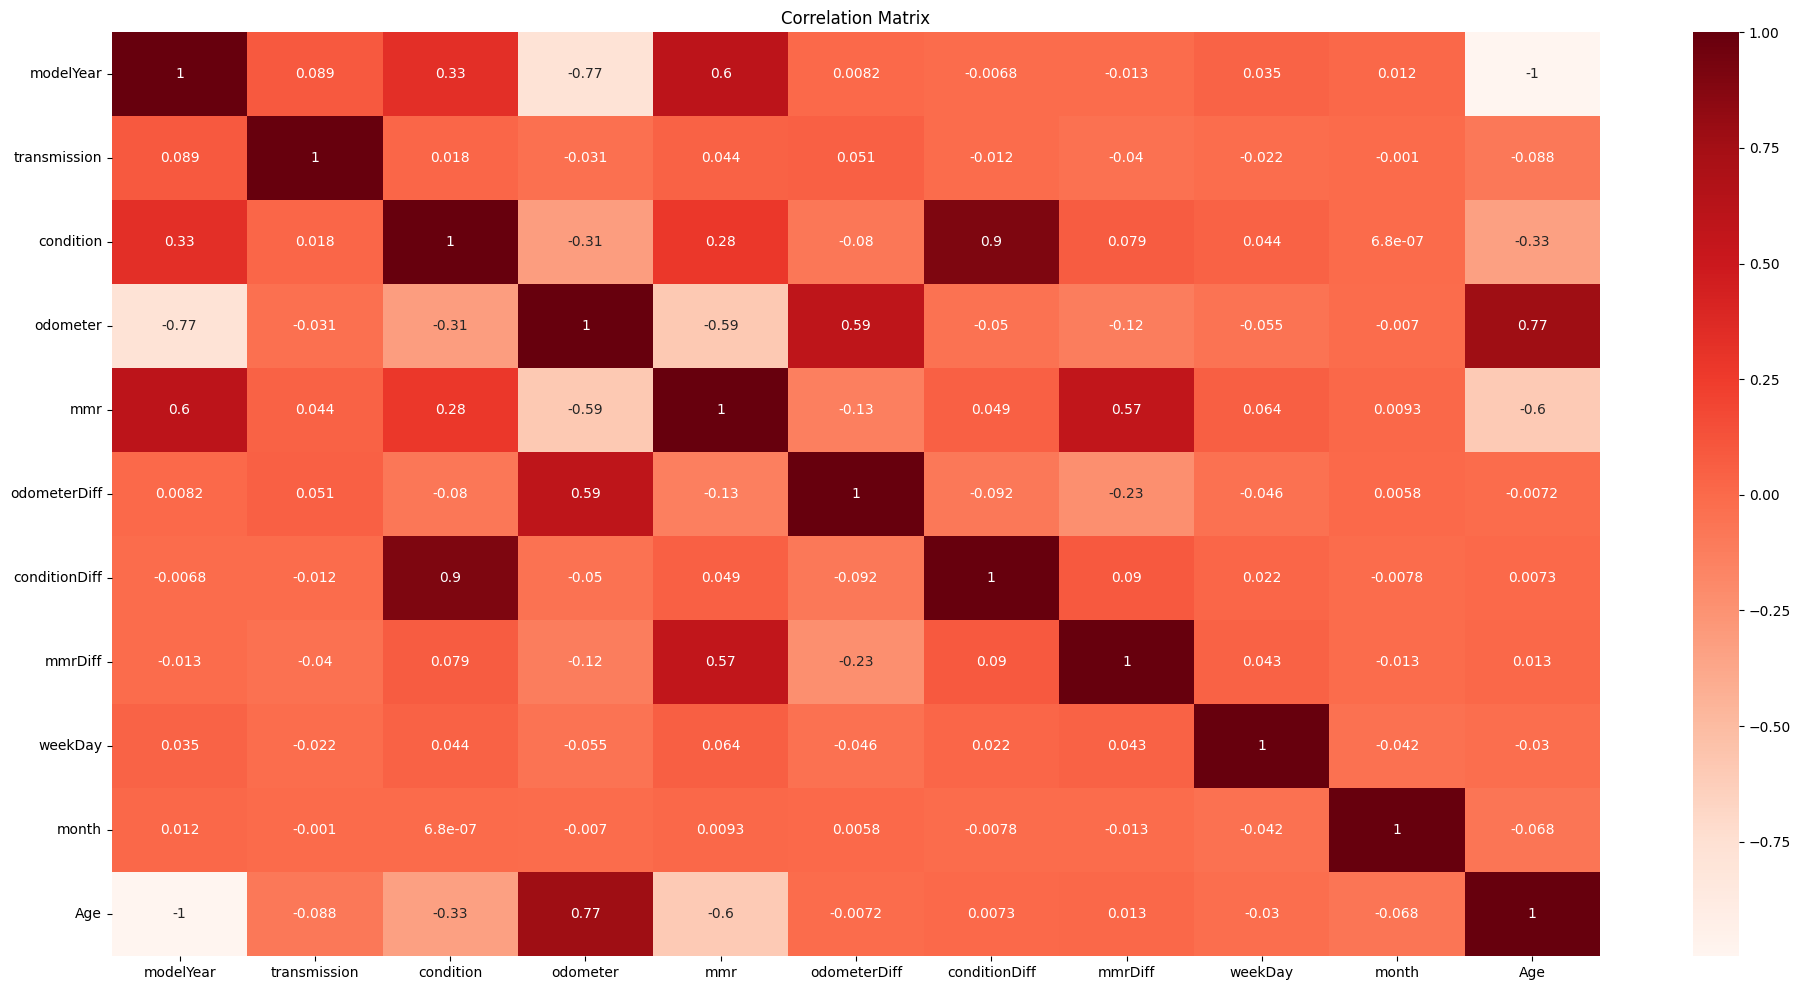

In [36]:
#Gonna model with different variables
#No colors or makes, dropping averages


#','avg_condition', 'condition', 'odometer', 'avg_odometer', 'mmr', 'avg_mmr',

X = merged_df.drop(columns = {'state','sellingprice','color', 'avg_sellingprice', 'avg_mmr', 'avg_condition', 'avg_odometer', 'make'}).copy()
y = merged_df['sellingprice'].copy()

#heat = X.drop(columns = {'state'}).copy()

plt.figure(figsize=(24, 12))
sns.heatmap(heat.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')


#X =pd.get_dummies(X,columns = ['state'])


X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 9, test_size = 0.25)



xgb_reg = xgb.XGBRegressor(max_depth = 6, n_estimators = 100)

xgb_reg.fit(X_train,
            y_train,
            verbose=1,
            )

score = xgb_reg.score(X_train, y_train)
print('Training Data score: ' + str(score))

ypred = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: " + str(mse))

print("RMSE: ", str(np.sqrt(mse)))


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

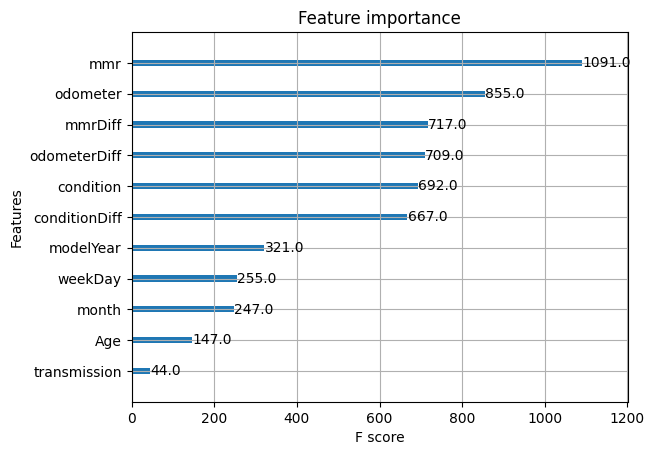

In [37]:
xgb.plot_importance(xgb_reg)

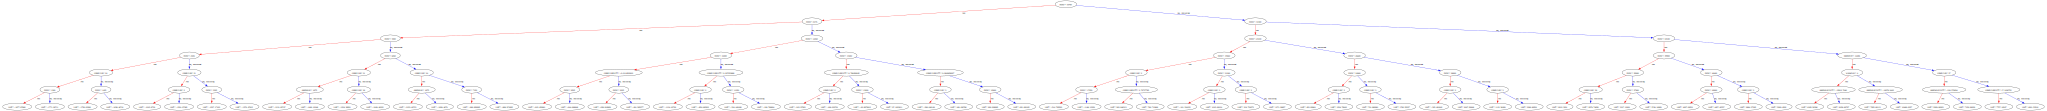

In [42]:
xgb.to_graphviz(xgb_reg, num_trees= 2)

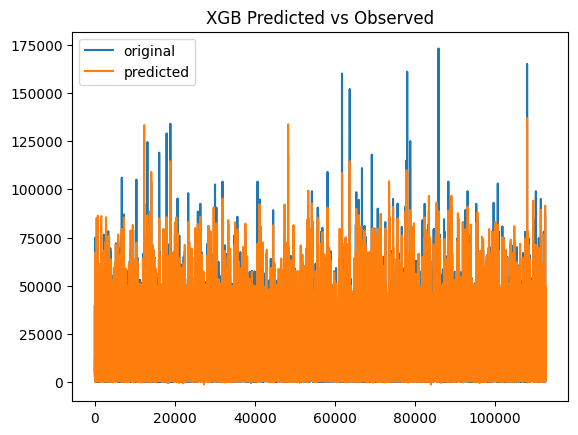

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label = "original")
plt.plot(x_ax, ypred, label = "predicted")
plt.title("XGB Predicted vs Observed")
plt.legend()
plt.show()